<a href="https://colab.research.google.com/github/namoshi/colab/blob/master/P2Pmatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 点パターンのマッチング問題を最適輸送を使って解く！

参考
[https://zenn.dev/yner/articles/optim_transport](https://zenn.dev/yner/articles/optim_transport)

In [27]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

In [28]:
def calc_cost(start: np.ndarray, end: np.ndarray, thresh: float) -> np.ndarray:
    cost = np.zeros((len(start), len(end)))

    for i in range(len(start)):
        for j in range(len(end)):
            cost[i, j] = np.linalg.norm(start[i] - end[j]) ** 2
            if cost[i, j] > thresh:
              cost[i, j] = thresh + 1.0

    return cost

In [29]:
def solve_transport_problem(
    C: np.ndarray,
    a: np.ndarray,
    b: np.ndarray,
) -> np.ndarray:
    num_x = len(a)
    num_y = len(b)

    c = C.flatten()
    A = []

    # \sum_{j}P_{i, j} = a_i
    for i in range(num_x):
        A_i = np.zeros((num_x, num_y))
        A_i[i, :] = 1
        A.append(A_i.flatten())

    # \sum_{i}P_{i, j} = b_j
    for j in range(num_y):
        A_j = np.zeros((num_x, num_y))
        A_j[:, j] = 1
        A.append(A_j.flatten())

    A = np.array(A)
    b = np.concatenate([a, b])

    res = linprog(c, A_eq=A, b_eq=b, method="highs")
    P = res.x.reshape((num_x, num_y))

    return P


In [30]:
def plot_transport(start: np.ndarray, end: np.ndarray, P: np.ndarray, thresh: float):
    plt.figure()
    plt.scatter(start[:, 0], start[:, 1], c="r", label="start")
    plt.scatter(end[:, 0], end[:, 1], c="b", label="end")

    for i in range(P.shape[0]):
        for j in range(P.shape[1]):
            if (P[i, j] > 0) and (np.linalg.norm(start[i] - end[j]) ** 2 <= thresh):
                plt.annotate(
                    "",
                    xy=end[j],
                    xytext=start[i],
                      arrowprops=dict(arrowstyle="->", color="k", lw=1),
                )

    plt.show()


In [31]:
N = 150
start = np.random.rand(N, 2)
end = np.random.rand(N,2)

#    print(start, end)

P:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Minimum Cost:  20.61734995277616


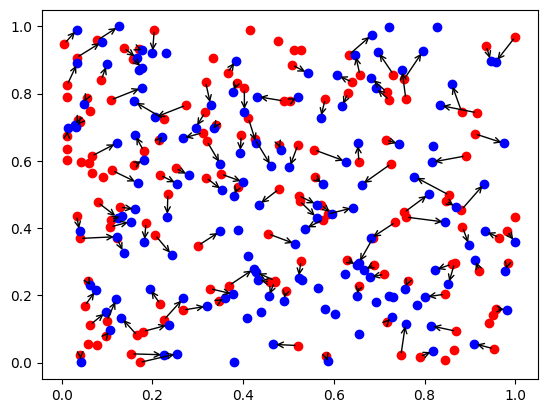

In [32]:

#    a = np.ones(4) / 4
#    b = np.ones(4) / 4
a = np.ones(N)
b = np.ones(N)

thresh=0.01
C = calc_cost(start, end, thresh)

P = solve_transport_problem(C, a, b)
print("P: ", P)
print("Minimum Cost: ", np.sum(P * C))

plot_transport(start, end, P, thresh)